# Wrangle and Analyze Data


## Table of Contents
- [Introduction](#intro)
- [Gather](#gather)
- [Assess](#assess)
- [Clean](#clean)
- [Storing, analyzing, and visualizing the wrangled data](#store_analyed_and_visualized)

<a id='intro'></a>
## Introduction

Real-world data rarely comes clean. In this project I will use Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. 

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user **@dog_rates**, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

<a id='gather'></a>
## Gather

**The WeRateDogs twitter archive data** "Existing file" the WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which they used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, they have filtered for tweets with ratings only (there are 2356)twitter_archive_enhanced.csv.

**The tweet image predictions data** "Downable file" i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv.

**The twitter API data** "JSON API file" Each tweet's retweet count and favorite ("like") count at minimum, and any additional data I find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

In [1]:
#import packages and 'magic word'

import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import requests
import json
import os
import seaborn as sns
from IPython.display import Image 

In [2]:
#Read the WeRateDogs twitter archive data

Twitter_archive_enhanced_data = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Download and read the tweet image predictions data 

Folder_name = 'image_predictions'
if not os.path.exists(Folder_name):
    os.makedirs(Folder_name)
  
URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(URL)
with open(os.path.join(Folder_name, URL.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

Image_predictions_data = pd.read_csv('image-predictions.tsv',sep ='\t')

In [4]:
#Unfortunately twitter didn't give me the access to get the data as developer account so, instead I will use the tweet-json file that Udacity provided it
#Read json file reference https://stackoverflow.com/questions/48488519/how-can-i-load-into-a-pandas-dataframe-tweets-from-a-json-file/48488624#48488624

#****************************************************************************
#Code for twitter API

#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

#Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

#NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
#df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
#change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
#NOTE TO REVIEWER: this student had mobile verification issues so the following
#Twitter API code was sent to this student from a Udacity instructor
#Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#This loop will likely take 20-30 minutes to run because of Twitter's rate limit
# for tweet_id in tweet_ids:
# count += 1
# print(str(count) + ": " + str(tweet_id))
#       try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#           print("Success")
#            json.dump(tweet._json, outfile)
#           outfile.write('\n')
#       except tweepy.TweepError as e:
#          print("Fail")
#         fails_dict[tweet_id] = e
#         pass
# end = timer()
# print(end - start)
# print(foken, access_secret)
# api = tweepy.API(auth)

#****************************************************************************

Tweet_json_data = pd.read_json('tweet-json.txt', orient = 'records', lines =True)

<a id='assess'></a>
## Assess

### Visual assessment

In [5]:
Twitter_archive_enhanced_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
Image_predictions_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
Tweet_json_data

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Programmatic assessment

In [8]:
Twitter_archive_enhanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
Image_predictions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
Tweet_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [11]:
#To check name column

Twitter_archive_enhanced_data['name'].value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
             ... 
Ricky           1
Snicku          1
Edd             1
incredibly      1
Boots           1
Name: name, Length: 957, dtype: int64

In [12]:
#To see the unique values

Twitter_archive_enhanced_data['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [13]:
#Put the wrong names in an array 

Wrong_names = ['getting', 'actually', 'such', 'the', 'infuriating', 'by', 'incredibly', 'one', 'quite', 'a', 'nan', 'very', 'my', 'not', 'his', 'officially', 'this', 'all', 'old', 'just', 'unacceptable', 'an', 'light', 'space', 'O', 'None']

In [14]:
Twitter_archive_enhanced_data['tweet_id'].duplicated().sum()

0

In [15]:
Image_predictions_data['tweet_id'].duplicated().sum()

0

In [16]:
Tweet_json_data['id'].duplicated().sum()

0

In [17]:
sum(Image_predictions_data.jpg_url.duplicated())

66

### Quality 

Quality: issues with content. Low quality data is also known as dirty data.

Data Quality Dimensions: Completeness, Validity, Accuracy, Consistency.

**Twitter_archive_enhanced_data:**

-Timestamp column is type object so I want it to change it to datetime type because it more appropriate

-tweet_id column is int type it should be string (object) type because I will not do any calculation or manipulation

-Replace None value to nan to be more professional 

-name column has wrong names that start with lower case and none values  such as
{'getting', 'actually', 'such', 'the', 'infuriating', 'by', 'incredibly', 'one', 'quite', 'a', 'nan', 'very', 'my', 'not', 'his', 'officially', 'this', 'all', 'old', 'just', 'unacceptable', 'an', 'light', 'space', 'O', 'None'} replace them with nan

**Image_predictions_data:**

-tweet_id column is int type it should be string (object) type because I will not do any calculation or manipulation

-Rename p1, p2 and p3 columns for more clarification 
 
-p1, p2 and p3 columns values replace underscore with space to be clear and with lower values 

-Duplicate jpg_url should be remove

**Tweet_json_data:**

-Rename id column to tweet_id in the Tweet_json_data to be consistent with other data table so I can merge them 

-tweet_id column is int type it should be string (object) type because I will not do any calculation or manipulation

### Tidiness
Tidiness: issues with structure that prevent easy analysis. Untidy data is also known as messy data.

Tidy data requirements:

- Each variable forms a column.

- Each observation forms a row.

- Each type of observational unit forms a table.

**Twitter_archive_enhanced_data:**

-In Twitter_archive_enhanced_data doggo, floofer, pupper, puppo columns merge them in one column called dog_stage

**Twitter_archive_enhanced_data + Image_predictions_data + Tweet_json_data**

-Merge all the dataset in one table

<a id='clean'></a>
## Clean

In [18]:
#Copy the data to clean them

Twitter_archive_enhanced_data_clean = Twitter_archive_enhanced_data.copy()
Image_predictions_data_clean = Image_predictions_data.copy()
Tweet_json_data_clean = Tweet_json_data.copy()

### Quality 

### Twitter_archive_enhanced_data

#### Define
Timestamp column is type object so I want it to change it to datetime type because it more appropriate

#### Code

In [19]:
Twitter_archive_enhanced_data_clean['timestamp'] = pd.to_datetime(Twitter_archive_enhanced_data_clean['timestamp'])

#### Test

In [20]:
Twitter_archive_enhanced_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Define
tweet_id column is int type it should be string (object) type because I will not do any calculation or manipulation

#### Code

In [21]:
Twitter_archive_enhanced_data_clean['tweet_id'] = Twitter_archive_enhanced_data_clean['tweet_id'].astype(str)

#### Test

In [22]:
Twitter_archive_enhanced_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Define
Replace None value to nan to be more professional 

#### Code

In [23]:
Twitter_archive_enhanced_data_clean.replace('None', np.nan, inplace=True)

#### Test

In [24]:
Twitter_archive_enhanced_data_clean.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


#### Define
name column has wrong names that start with lower case and none values  such as
{'getting', 'actually', 'such', 'the', 'infuriating', 'by', 'incredibly', 'one', 'quite', 'a', 'nan', 'very', 'my', 'not', 'his', 'officially', 'this', 'all', 'old', 'just', 'unacceptable', 'an', 'light', 'space', 'O', 'None'} replace them with nan

#### Code

In [25]:
for i in Wrong_names:     
    Twitter_archive_enhanced_data_clean['name'].replace(i, np.nan ,inplace = True)


#### Test

In [26]:
Twitter_archive_enhanced_data_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

### Image_predictions_data

#### Define
tweet_id column is int type it should be string (object) type because I will not do any calculation or manipulation

#### Code

In [27]:
Image_predictions_data_clean['tweet_id'] = Image_predictions_data_clean['tweet_id'].astype(str)

#### Test

In [28]:
Image_predictions_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define
Rename p1, p2 and p3 columns for more clarification

#### Code

In [29]:
Image_predictions_data_clean.rename(columns = {"p1" :"#1_prediction_algorithm(p1)" , "p2" :"#2_prediction_algorithm(p2)" ,  "p3" :"#3_prediction_algorithm(p3)"} , inplace = True )

#### Test

In [30]:
Image_predictions_data_clean.head()

,tweet_id,jpg_url,img_num,#1_prediction_algorithm(p1),p1_conf,p1_dog,#2_prediction_algorithm(p2),p2_conf,p2_dog,#3_prediction_algorithm(p3),p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define
p1, p2 and p3 columns values replace underscore with space to be clear and with lower values 

#### Code

In [31]:
Image_predictions_data_clean['#1_prediction_algorithm(p1)'] = Image_predictions_data_clean['#1_prediction_algorithm(p1)'].str.lower()
Image_predictions_data_clean['#2_prediction_algorithm(p2)'] = Image_predictions_data_clean['#2_prediction_algorithm(p2)'].str.lower()
Image_predictions_data_clean['#3_prediction_algorithm(p3)'] = Image_predictions_data_clean['#3_prediction_algorithm(p3)'].str.lower()

Image_predictions_data_clean['#1_prediction_algorithm(p1)'] = Image_predictions_data_clean['#1_prediction_algorithm(p1)'].str.replace('_', ' ')
Image_predictions_data_clean['#2_prediction_algorithm(p2)'] = Image_predictions_data_clean['#2_prediction_algorithm(p2)'].str.replace('_', ' ')
Image_predictions_data_clean['#3_prediction_algorithm(p3)'] = Image_predictions_data_clean['#3_prediction_algorithm(p3)'].str.replace('_', ' ')


#### Test

In [32]:
Image_predictions_data_clean.head()

,tweet_id,jpg_url,img_num,#1_prediction_algorithm(p1),p1_conf,p1_dog,#2_prediction_algorithm(p2),p2_conf,p2_dog,#3_prediction_algorithm(p3),p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Define
Duplicate jpg_url should be remove

#### Code

In [33]:
Image_predictions_data_clean = Image_predictions_data_clean.drop_duplicates(subset = ['jpg_url'], keep = 'last')

#### Test

In [34]:
sum(Image_predictions_data_clean.jpg_url.duplicated())

0

### Tweet_json_data

#### Define
Rename id column to tweet_id in the Tweet_json_data to be consistent with other data table so I can merge them 

#### Code

In [35]:
Tweet_json_data_clean.rename(index = str, columns = {"id" :"tweet_id"} , inplace = True )

#### Test

In [36]:
print(Tweet_json_data_clean.columns)

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')


#### Define
tweet_id column is int type it should be string (object) type because I will not do any calculation or manipulation

#### Code

In [37]:
Tweet_json_data_clean['tweet_id'] = Tweet_json_data_clean['tweet_id'].astype(str)

#### Test

In [38]:
Tweet_json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   object             
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_str    

### Tidiness

#### Define
In Twitter_archive_enhanced_data doggo, floofer, pupper, puppo columns merge them in one column called dog_stage

#### Code

In [39]:
Twitter_archive_enhanced_data_clean['dog_stage'] = Twitter_archive_enhanced_data_clean[['doggo', 'floofer', 'pupper', 'puppo']].fillna('').sum(axis=1).astype(str)
Twitter_archive_enhanced_data_clean.loc[Twitter_archive_enhanced_data_clean['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'doggo , puppo'
Twitter_archive_enhanced_data_clean.loc[Twitter_archive_enhanced_data_clean['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'doggo , floofer'
Twitter_archive_enhanced_data_clean.loc[Twitter_archive_enhanced_data_clean['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo , pupper'
Twitter_archive_enhanced_data_clean = Twitter_archive_enhanced_data_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'] , axis = 1)

#### Test

In [40]:
Twitter_archive_enhanced_data_clean.dog_stage.value_counts()

                   1976
pupper              245
doggo                83
puppo                29
doggo , pupper       12
floofer               9
doggo , puppo         1
doggo , floofer       1
Name: dog_stage, dtype: int64

#### Define
Merge all the dataset in one table

#### Code

In [41]:
#Merge function reference hhttps://towardsdatascience.com/why-and-how-to-use-merge-with-pandas-in-python-548600f7e738

Merge_data = pd.merge(Twitter_archive_enhanced_data_clean, Image_predictions_data_clean, how = 'inner', on = ['tweet_id'])
Merge_data = pd.merge(Merge_data, Tweet_json_data_clean, how = 'inner', on = ['tweet_id'])

#### Test

In [42]:
Merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 2006
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2007 non-null   object             
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      2007 non-null   datetime64[ns, UTC]
 4   source_x                       2007 non-null   object             
 5   text                           2007 non-null   object             
 6   retweeted_status_id            79 non-null     float64            
 7   retweeted_status_user_id       79 non-null     float64            
 8   retweeted_status_timestamp     79 non-null     object             
 9   expanded_urls                  2007 non-null   object             
 10  rating_numerator        

<a id='store_analyed_and_visualized'></a>
## Storing, analyzing, and visualizing the wrangled data

### Storing

In [43]:
#Store the merged data to twitter_archive_master.csv

Merge_data.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

### Insights

In [44]:
Twitter_data = pd.read_csv("twitter_archive_master.csv")

In [45]:
#Group the image by the image number

Img_group = Twitter_data.groupby('img_num')['tweet_id'].count()
Img_group

img_num
1    1723
2     192
3      62
4      30
Name: tweet_id, dtype: int64

In [46]:
#Counting the boolean values for p1_dog column to check which prediction algorithm is predicting well

Twitter_data['p1_dog'].value_counts()

True     1479
False     528
Name: p1_dog, dtype: int64

In [47]:
#Counting the boolean values for p2_dog column to check which prediction algorithm is predicting well

Twitter_data['p2_dog'].value_counts()

True     1499
False     508
Name: p2_dog, dtype: int64

In [48]:
#Counting the boolean values for p3_dog column to check which prediction algorithm is predicting well

Twitter_data['p3_dog'].value_counts()

True     1449
False     558
Name: p3_dog, dtype: int64

In [49]:
#Five number summary for the rating numerator column

Twitter_data.loc[:,['rating_numerator']].describe()

,rating_numerator
count,2007.000000
mean,12.277529
std,41.363515
min,0.000000
25%,10.000000
50%,11.000000
75%,12.000000
max,1776.000000


In [50]:
#Five number summary for the rating denominator column

Twitter_data.loc[:,['rating_denominator']].describe()

,rating_denominator
count,2007.000000
mean,10.528650
std,7.297075
min,2.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,170.000000


### Visualization

>Most frequent dogs name

I observed that Charlie is the most frequent dog name

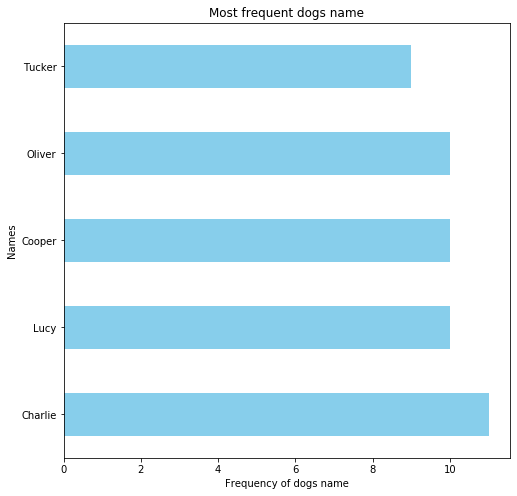

In [51]:
#Color reference https://python-graph-gallery.com/

names_array = Twitter_data['name'].value_counts().head()
names_array.plot(kind='barh', color = "skyblue",figsize=(8,8));
plt.title("Most frequent dogs name");
plt.ylabel('Names');
plt.xlabel("Frequency of dogs name");

>Correlation between the data

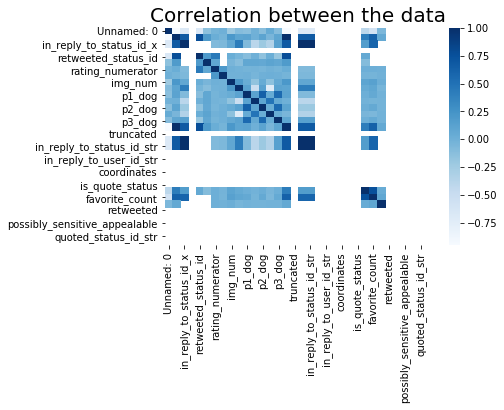

In [52]:
sns.heatmap(Twitter_data.corr(), cmap="Blues")
plt.title('Correlation between the data', size=20);

>Trying to extract the first image 

In [53]:
Image(url = 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg')